<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#ISE-291-Term-Project" data-toc-modified-id="ISE-291-Term-Project-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>ISE 291 Term Project</a></span><ul class="toc-item"><li><span><a href="#Task-1" data-toc-modified-id="Task-1-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Task-1</a></span></li><li><span><a href="#Task-2" data-toc-modified-id="Task-2-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Task-2</a></span></li><li><span><a href="#Task-3" data-toc-modified-id="Task-3-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Task-3</a></span></li><li><span><a href="#Task-4" data-toc-modified-id="Task-4-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Task-4</a></span></li><li><span><a href="#Task-5" data-toc-modified-id="Task-5-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Task-5</a></span></li><li><span><a href="#Task-6" data-toc-modified-id="Task-6-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Task-6</a></span></li><li><span><a href="#Task-7" data-toc-modified-id="Task-7-1.7"><span class="toc-item-num">1.7&nbsp;&nbsp;</span>Task-7</a></span></li><li><span><a href="#Task-8" data-toc-modified-id="Task-8-1.8"><span class="toc-item-num">1.8&nbsp;&nbsp;</span>Task-8</a></span></li><li><span><a href="#Task-9" data-toc-modified-id="Task-9-1.9"><span class="toc-item-num">1.9&nbsp;&nbsp;</span>Task-9</a></span></li><li><span><a href="#Task-10" data-toc-modified-id="Task-10-1.10"><span class="toc-item-num">1.10&nbsp;&nbsp;</span>Task-10</a></span></li><li><span><a href="#References" data-toc-modified-id="References-1.11"><span class="toc-item-num">1.11&nbsp;&nbsp;</span>References</a></span></li></ul></li></ul></div>

# ISE 291 Term Project 

Group Number =   G0801

Group Members:5

Names                    Student IDs |
Abdullah Almajdouie      201923470 | Abdulmalik Alfarraj 201971890 | Abdulaziz Alsulaimani 201937490 | Abdulrahman Alfehaid 201947930 | Khalid Albaqmi 201934770



## Task-1

In [8]:
import pandas as pd
import numpy as np
df= pd.read_csv("Group_08_01_A.csv",delimiter=",")
print("\n\nData Before Cleaning")
display(df)
# we first we fix inconssisnt data types
obj_columns = df.select_dtypes('object').columns
num_columns = df.select_dtypes(exclude='object').columns
print(obj_columns)
print(num_columns)

#we can conclude that model price, sale price, KPL should all be numercal values
df['Sale_Price'] = df['Sale_Price'].apply(lambda x : int(x.replace('SAR','').replace(',',''))if type(x)==str else x)
df['Model_Price'] = df['Model_Price'].apply(lambda x :int(x.replace('SAR','').replace(',','')) if type(x)==str else x)
df['KPL'] = df['KPL'].apply(lambda x :float(x.replace('mpl','').replace(',',''))/1000 if (type(x)==str) &("mpl" in x) else float(x))

#check for spelling/captilaxtion errors
for i in df.select_dtypes(include="object").columns:
    print(df[i].unique())

# we can see that some types and cities and colors are written wrong 
df['Class'] = df['Class'].apply(lambda x :x.lower())
df['Manufacturer'] = df['Manufacturer'].apply(lambda x : x.replace('BeEmW','BMW').replace('Nesshan','Nissan').replace('Fourd','Ford').replace('JournalMotors','GeneralMotors').replace('Shevy','Chevy').replace("Toyoda",'Toyota').replace("Masda",'Mazda').replace("Geep",'Jeep').replace("Honta",'Honda').replace("Huendae",'Hyundai').replace("Wolksvagon",'Volkswagon').replace("Mercetes",'Mercedes'))
df['Color'] = df['Color'].apply(lambda x : x.replace('White Color','White').replace('Silver Color','Silver').replace('Color Black','Black').replace('Red Color','Red').replace('Gray Color','Gray').replace('Color Blue','Blue'))

# some history values are negative
seleted_cols= df.select_dtypes(exclude='object').columns
df[seleted_cols]=df[seleted_cols].applymap(lambda x: x if x>=0 else abs(x))

#filling missing data by mean for num and mode for obj
null_columns=df.columns[df.isna().any()]
for c in null_columns:
    value = df[c].mean() if df[c].dtype!='object' else df[c].mode()
    df[c].fillna(value,inplace=True)

#remove outliers by using interquartile range
for i in num_columns:
    Q3, Q1 = np.percentile(df[i], [75 ,25])
    IQR = Q3 - Q1
    UW = Q3 + 1.5*IQR
    LW = Q3 - 1.5*IQR
    index_row = df[ (df[i]>UW) | (df[i]<LW) ].index
    df.drop(index_row , inplace=True)
#display(df)
#display(df.sample(10))
#display(df.describe(include='number'))
#display(df.describe(include='object'))
print("\n\nData After Cleaning")
display(df)
for i in df.select_dtypes(include="object").columns:
    print(df[i].unique())



Data Before Cleaning


Manufacturer       Type  Cylinders  Model_Year  Model_Price  Sold_Year  \
0             BeEmW        suv          4        1996          NaN       2001   
1           Nesshan      sedan          8        2006   56,009 SAR       2010   
2             Fourd  crossover          4        2004  108,530 SAR       2012   
3     JournalMotors  crossover          4        2001   85,225 SAR       2007   
4     JournalMotors        suv          6        2006  117,620 SAR       2009   
...             ...        ...        ...         ...          ...        ...   
2995         Toyoda      sedan          4        2002   62,093 SAR       2004   
2996       Mercetes        suv          8        2003  110,836 SAR       2007   
2997        Huendae        suv          4        1996   82,705 SAR       1998   
2998        Nesshan  crossover          8        2000   83,554 SAR       2008   
2999          Shevy  crossover          8        2001          NaN       2007   

      Sale_Price  KM_Driven         KPL Power     Class Location  \
0     42,791 SAR     205228        5.31   2WD  STANDARD  Madinah   
1     34,610 SAR     156570       11.28   2WD  standard  Madinah   
2     27,837 SAR     134971        7.85   4WD  standard   Riyadh   
3     36,433 SAR      47227        7.46   2WD  standard   Riyadh   
4     66,372 SAR      56995        2.41   2WD  standard   Dammam   
...          ...        ...         ...   ...       ...      ...   
2995  51,605 SAR      39136  17800.0mpl   2WD  standard   Dammam   
2996  55,911 SAR      96810        3.01   2WD  standard  Dhahran   
2997  57,054 SAR      39371  12450.0mpl   4WD  standard   Makkah   
2998  24,871 SAR     164398  11330.0mpl   2WD   PREMIUM  Madinah   
2999  43,720 SAR      70773        5.59   4WD  STANDARD  Dhahran   

      Accident_History  Owner_History        Color Seller_Type  \
0                    6              3         Blue  individual   
1                    3             -2        Black  individual   
2                    5              2         Blue     company   
3                   11              2         Gray  individual   
4                   10             -5        Black  individual   
...                ...            ...          ...         ...   
2995                 6              2  White Color  individual   
2996                 5              2        Black  individual   
2997                 9              3        Black  individual   
2998                10              3        Black  individual   
2999                 7             -5  White Color  individual   

      Service_History  
0                   1  
1                   1  
2                   0  
3                   0  
4                   0  
...               ...  
2995                0  
2996                0  
2997                0  
2998                1  
2999                0  

[3000 rows x 17 columns]

Index(['Manufacturer', 'Type', 'Model_Price', 'Sale_Price', 'KPL', 'Power',
       'Class', 'Location', 'Color', 'Seller_Type'],
      dtype='object')
Index(['Cylinders', 'Model_Year', 'Sold_Year', 'KM_Driven', 'Accident_History',
       'Owner_History', 'Service_History'],
      dtype='object')
['BeEmW' 'Nesshan' 'Fourd' 'JournalMotors' 'Shevy' 'Toyoda' 'Masda' 'Geep'
 'Honta' 'Huendae' 'Wolksvagon' 'Mercetes']
['suv' 'sedan' 'crossover']
['2WD' '4WD']
['STANDARD' 'standard' 'premium' 'PREMIUM']
['Madinah' 'Riyadh' 'Dammam' 'Makkah' 'Dhahran' 'Jeddah']
['Blue' 'Black' 'Gray' 'Red' 'White' 'White Color' 'Silver' 'Brown'
 'Silver Color' 'Color Black' 'Red Color' 'Gray Color' 'Color Blue']
['individual' 'company']


Data After Cleaning


Manufacturer       Type  Cylinders  Model_Year    Model_Price  \
0               BMW        suv          4        1996   88713.218971   
1            Nissan      sedan          8        2006   56009.000000   
2              Ford  crossover          4        2004  108530.000000   
3     GeneralMotors  crossover          4        2001   85225.000000   
6              Ford  crossover          4        2007  115173.000000   
...             ...        ...        ...         ...            ...   
2992         Nissan      sedan          4        2003   88713.218971   
2994           Jeep        suv          4        2008   88713.218971   
2995         Toyota      sedan          4        2002   62093.000000   
2996       Mercedes        suv          8        2003  110836.000000   
2998         Nissan  crossover          8        2000   83554.000000   

      Sold_Year  Sale_Price  KM_Driven    KPL Power     Class Location  \
0          2001       42791     205228   5.31   2WD  standard  Madinah   
1          2010       34610     156570  11.28   2WD  standard  Madinah   
2          2012       27837     134971   7.85   4WD  standard   Riyadh   
3          2007       36433      47227   7.46   2WD  standard   Riyadh   
6          2010       64992      60857   3.72   4WD  standard  Dhahran   
...         ...         ...        ...    ...   ...       ...      ...   
2992       2008       28529      61743  16.19   2WD  standard   Jeddah   
2994       2014       52314     135261   6.03   2WD  standard   Makkah   
2995       2004       51605      39136  17.80   2WD  standard   Dammam   
2996       2007       55911      96810   3.01   2WD  standard  Dhahran   
2998       2008       24871     164398  11.33   2WD   premium  Madinah   

      Accident_History  Owner_History   Color Seller_Type  Service_History  
0                    6              3    Blue  individual                1  
1                    3              2   Black  individual                1  
2                    5              2    Blue     company                0  
3                   11              2    Gray  individual                0  
6                    6              3   Black     company                0  
...                ...            ...     ...         ...              ...  
2992                 4              2     Red  individual                0  
2994                 5              2  Silver  individual                0  
2995                 6              2   White  individual                0  
2996                 5              2   Black  individual                0  
2998                10              3   Black  individual                1  

[1817 rows x 17 columns]

['BMW' 'Nissan' 'Ford' 'GeneralMotors' 'Chevy' 'Toyota' 'Jeep' 'Honda'
 'Mazda' 'Hyundai' 'Volkswagon' 'Mercedes']
['suv' 'sedan' 'crossover']
['2WD' '4WD']
['standard' 'premium']
['Madinah' 'Riyadh' 'Dhahran' 'Jeddah' 'Dammam' 'Makkah']
['Blue' 'Black' 'Gray' 'Red' 'White' 'Silver' 'Brown']
['individual' 'company']


## Task-2

Manufacturer       Type  Cylinders  Model_Year  Model_Price  Sold_Year  \
0           Huendae  crossover          4        2008   83,912 SAR       2016   
1           Nesshan  crossover          4        2005   79,072 SAR       2008   
2        Wolksvagon      sedan          6        2006   67,211 SAR       2011   
3     JournalMotors        suv          8        2004  113,052 SAR       2007   
4             Fourd      sedan          8        2001   71,021 SAR       2006   
...             ...        ...        ...         ...          ...        ...   
4995         Toyoda      sedan          4        2001   60,875 SAR       2005   
4996          Shevy        suv          4        2002  152,128 SAR       2011   
4997          Honta  crossover          8        1995   64,866 SAR       1999   
4998  JournalMotors  crossover          4        1999  114,682 SAR       2004   
4999          Fourd        suv          4        2002  130,395 SAR       2004   

      Sale_Price  KM_Driven    KPL Power     Class Location  Accident_History  \
0     25,110 SAR     325624  14.29   4WD  standard   Dammam                 2   
1     63,290 SAR      36118  17.24   4WD  standard  Madinah                 2   
2     36,172 SAR      97904  10.25   2WD  standard  Madinah                 5   
3     60,605 SAR     110697   2.64   2WD  standard  Madinah                14   
4     31,575 SAR      47225   5.48   2WD  standard   Riyadh                11   
...          ...        ...    ...   ...       ...      ...               ...   
4995  38,846 SAR     159135  20.10   2WD  standard   Jeddah                 4   
4996  40,971 SAR     185570   5.50   2WD   premium   Makkah                 4   
4997  42,193 SAR      85605   7.70   4WD  standard   Dammam                 3   
4998  50,987 SAR      43543   7.20   2WD   premium   Dammam                 9   
4999  85,455 SAR      22641   7.40   4WD  standard   Jeddah                 6   

      Owner_History  Color Seller_Type  Service_History  
0                 2  Black  individual                0  
1                 1  Black  individual                1  
2                 2  White  individual                0  
3                 3   Gray  individual                0  
4                 2    Red  individual                0  
...             ...    ...         ...              ...  
4995              3   Gray  individual                0  
4996              3   Gray     company                1  
4997              2   Blue  individual                1  
4998              2  White     company                0  
4999              3   Blue     company                1  

[5000 rows x 17 columns]

Index(['Manufacturer', 'Type', 'Power', 'Class', 'Location', 'Color',
       'Seller_Type'],
      dtype='object')


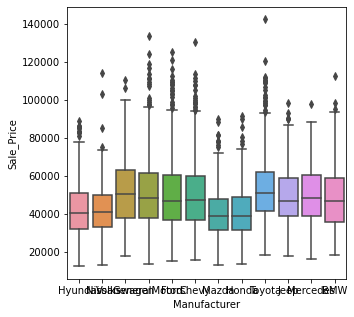

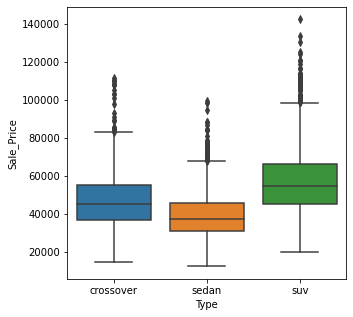

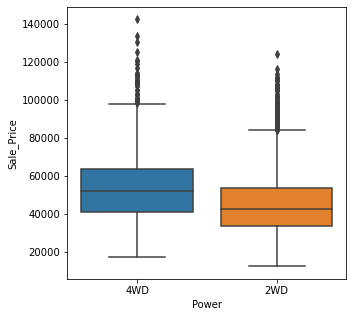

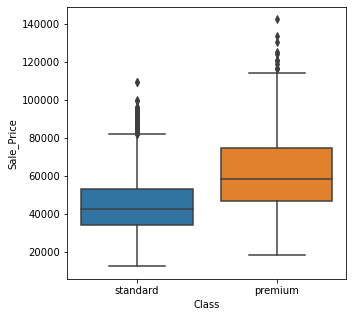

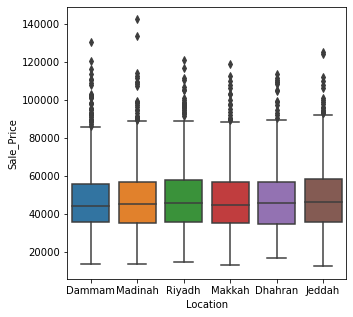

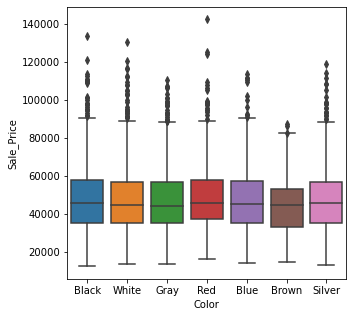

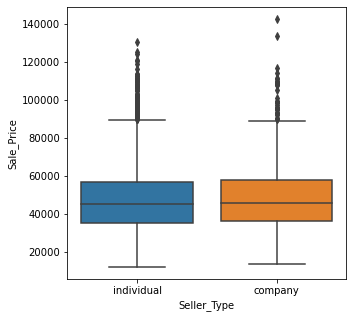

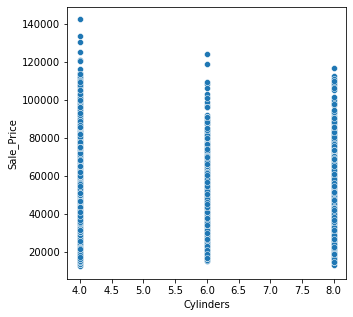

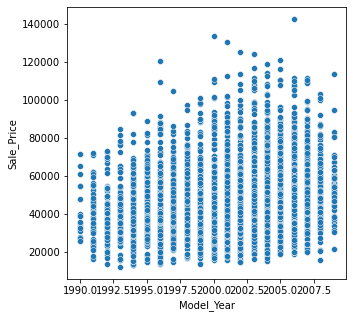

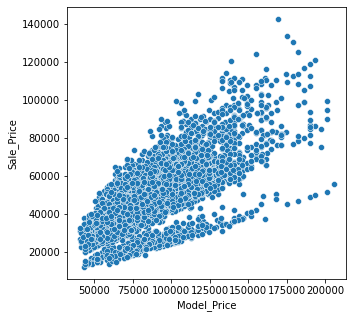

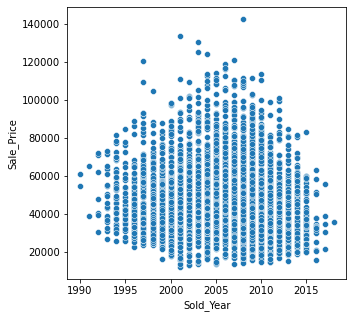

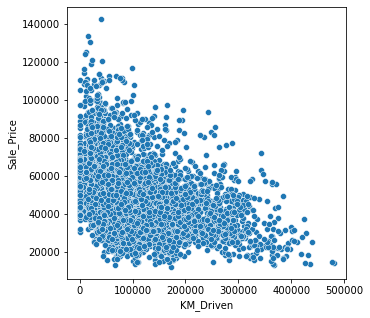

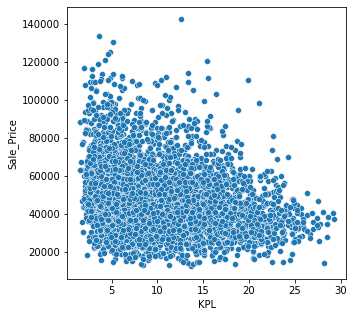

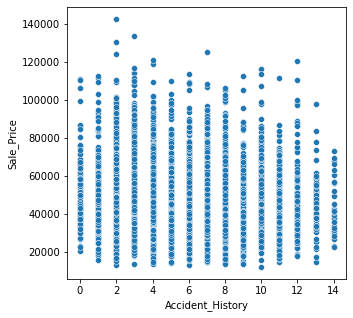

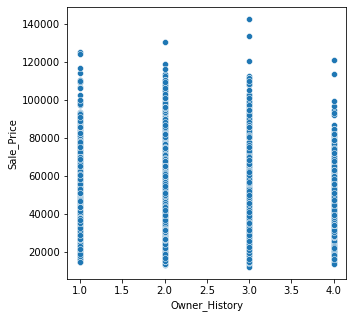

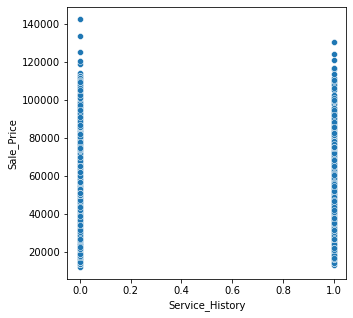

Manufacturer       Type  Cylinders  Model_Year  Model_Price  Sold_Year  \
0           Hyundai  crossover          4        2008        83912       2016   
1            Nissan  crossover          4        2005        79072       2008   
2        Volkswagen      sedan          6        2006        67211       2011   
3     GeneralMotors        suv          8        2004       113052       2007   
4              Ford      sedan          8        2001        71021       2006   
...             ...        ...        ...         ...          ...        ...   
4995         Toyota      sedan          4        2001        60875       2005   
4996          Chevy        suv          4        2002       152128       2011   
4997          Honda  crossover          8        1995        64866       1999   
4998  GeneralMotors  crossover          4        1999       114682       2004   
4999           Ford        suv          4        2002       130395       2004   

      Sale_Price  KM_Driven    KPL Power     Class Location  Accident_History  \
0          25110     325624  14.29   4WD  standard   Dammam                 2   
1          63290      36118  17.24   4WD  standard  Madinah                 2   
2          36172      97904  10.25   2WD  standard  Madinah                 5   
3          60605     110697   2.64   2WD  standard  Madinah                14   
4          31575      47225   5.48   2WD  standard   Riyadh                11   
...          ...        ...    ...   ...       ...      ...               ...   
4995       38846     159135  20.10   2WD  standard   Jeddah                 4   
4996       40971     185570   5.50   2WD   premium   Makkah                 4   
4997       42193      85605   7.70   4WD  standard   Dammam                 3   
4998       50987      43543   7.20   2WD   premium   Dammam                 9   
4999       85455      22641   7.40   4WD  standard   Jeddah                 6   

      Owner_History  Color Seller_Type  Service_History  
0                 2  Black  individual                0  
1                 1  Black  individual                1  
2                 2  White  individual                0  
3                 3   Gray  individual                0  
4                 2    Red  individual                0  
...             ...    ...         ...              ...  
4995              3   Gray  individual                0  
4996              3   Gray     company                1  
4997              2   Blue  individual                1  
4998              2  White     company                0  
4999              3   Blue     company                1  

[5000 rows x 17 columns]

['Hyundai' 'Nissan' 'Volkswagen' 'GeneralMotors' 'Ford' 'Chevy' 'Mazda'
 'Honda' 'Toyota' 'Jeep' 'Mercedes' 'BMW']
['crossover' 'sedan' 'suv']
['4WD' '2WD']
['standard' 'premium']
['Dammam' 'Madinah' 'Riyadh' 'Makkah' 'Dhahran' 'Jeddah']
['Black' 'White' 'Gray' 'Red' 'Blue' 'Brown' 'Silver']
['individual' 'company']


In [9]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("Group_08_01_B.csv",delimiter=",")
display(df)


#removing sympol which make a problem with data and correct it (changing object to numper with propreate colume)
df["Sale_Price"]=df["Sale_Price"].apply(lambda x: int(x.replace("SAR", "").replace(',','')))
f=df["Model_Price"].isna().tolist()
df["Model_Price"]=df["Model_Price"].apply(lambda x:  x if not f else str(x).replace("SAR", "").replace(',',''))
df["Model_Price"]=df["Model_Price"].apply(lambda x:  int(x.replace('nan','0')))
obj_columns = df.select_dtypes('object').columns
num_columns = df.select_dtypes(exclude='object').columns.drop("Sale_Price")
print(obj_columns)
# correct the spelling of Manufacturer to give the right name of the company  
df['Manufacturer'] = df['Manufacturer'].apply(lambda x : x.replace('Masda','Mazda').replace('Shevy','Chevy')
                                              .replace('Honta','Honda').replace('Nesshan','Nissan')
                                              .replace('Wolksvagon','Volkswagen').replace("Huendae",'Hyundai').
                                              replace("Fourd",'Ford').replace("Toyoda",'Toyota').replace("JournalMotors",'GeneralMotors').replace
                                              ("BeEmW",'BMW').replace("Geep",'Jeep').replace
                                              ("Mercetes",'Mercedes')) 
# After we clean the data now we will creat the Pair wise plots: boxplot for Categorical- scatterplot for numerical
for c in obj_columns:
    plt.figure(figsize=(5,5))
    sns.boxplot(y="Sale_Price",x=c,data=df);
    plt.show()
for c in num_columns:
    plt.figure(figsize=(5,5))
    sns.scatterplot(y="Sale_Price",x=c,data=df);
    plt.show()
display(df)
for m in df.select_dtypes(include="object").columns:
    print(df[m].unique())

## Task-3

In [10]:

corrolate = df.corr(method = 'pearson')
#display(corrolate.sort_values(by=['Sale_Price'], inplace=False, ascending=False)["Sale_Price"].head(3))
#display(corrolate.sort_values(by=['Sale_Price'], inplace=False, ascending=True)["Sale_Price"].head(3))
#corrolate.style.background_gradient(cmap='coolwarm').set_precision(4)  
display(corrolate)

#top three correlated variables.
corrolate= corrolate.apply(lambda x: np.abs(x))
sorted_corr = corrolate.sort_values(by=["Sale_Price"], ascending=False) # negative values will be considered using abs.
sorted_corr = sorted_corr["Sale_Price"].index
print('The top three correlated input variables are: ',sorted_corr[1:4].tolist())


#bottom three correlated variables.
corrolate= corrolate.apply(lambda x: np.abs(x))
sorted_corr = corrolate.sort_values(by=["Sale_Price"], ascending=True) # negative values will be considered using abs.
sorted_corr = sorted_corr["Sale_Price"].index
print('The bottom three correlated input variables are: ',sorted_corr[0:3].tolist())

Cylinders  Model_Year  Model_Price  Sold_Year  Sale_Price  \
Cylinders          1.000000    0.023210    -0.000988   0.028716   -0.032429   
Model_Year         0.023210    1.000000     0.276023   0.904195    0.222206   
Model_Price       -0.000988    0.276023     1.000000   0.252878    0.731536   
Sold_Year          0.028716    0.904195     0.252878   1.000000   -0.037582   
Sale_Price        -0.032429    0.222206     0.731536  -0.037582    1.000000   
KM_Driven          0.008121    0.020465     0.024775   0.267704   -0.356834   
KPL               -0.307444   -0.008348    -0.520459  -0.012528   -0.250607   
Accident_History  -0.000984    0.031950    -0.002679   0.031813   -0.098012   
Owner_History      0.012590    0.029474     0.023770   0.021666    0.001034   
Service_History   -0.002490   -0.008628     0.001924  -0.010490    0.062979   

                  KM_Driven       KPL  Accident_History  Owner_History  \
Cylinders          0.008121 -0.307444         -0.000984       0.012590   
Model_Year         0.020465 -0.008348          0.031950       0.029474   
Model_Price        0.024775 -0.520459         -0.002679       0.023770   
Sold_Year          0.267704 -0.012528          0.031813       0.021666   
Sale_Price        -0.356834 -0.250607         -0.098012       0.001034   
KM_Driven          1.000000 -0.018765         -0.001313      -0.000007   
KPL               -0.018765  1.000000         -0.022984      -0.004939   
Accident_History  -0.001313 -0.022984          1.000000       0.013509   
Owner_History     -0.000007 -0.004939          0.013509       1.000000   
Service_History   -0.005121 -0.011688          0.003761      -0.003439   

                  Service_History  
Cylinders               -0.002490  
Model_Year              -0.008628  
Model_Price              0.001924  
Sold_Year               -0.010490  
Sale_Price               0.062979  
KM_Driven               -0.005121  
KPL                     -0.011688  
Accident_History         0.003761  
Owner_History           -0.003439  
Service_History          1.000000

The top three correlated input variables are:  ['Model_Price', 'KM_Driven', 'KPL']
The bottom three correlated input variables are:  ['Owner_History', 'Cylinders', 'Sold_Year']


## Task-4

Manufacturer       Type  Cylinders  Model_Year  Model_Price  Sold_Year  \
0        Hyundai  crossover          4        2008        83912       2016   
1         Nissan  crossover          4        2005        79072       2008   
2     Volkswagen      sedan          6        2006        67211       2011   
3  GeneralMotors        suv          8        2004       113052       2007   
4           Ford      sedan          8        2001        71021       2006   
5          Chevy  crossover          4        1997        94482       2001   
6  GeneralMotors        suv          4        2007       143967       2011   
7  GeneralMotors      sedan          4        2002        86930       2003   
8        Hyundai        suv          4        2004        80752       2008   
9          Mazda      sedan          8        1996        45947       2001   

   Sale_Price  KM_Driven    KPL Power  ... Location Accident_History  \
0       25110     325624  14.29   4WD  ...   Dammam                2   
1       63290      36118  17.24   4WD  ...  Madinah                2   
2       36172      97904  10.25   2WD  ...  Madinah                5   
3       60605     110697   2.64   2WD  ...  Madinah               14   
4       31575      47225   5.48   2WD  ...   Riyadh               11   
5       47661      35775   6.65   4WD  ...   Riyadh               12   
6       72624      44685   5.04   4WD  ...   Dammam                5   
7       66066      11947   9.28   4WD  ...   Makkah                3   
8       49525      34506  18.52   2WD  ...   Makkah                6   
9       22578     102886   7.72   2WD  ...   Makkah               12   

   Owner_History  Color Seller_Type Service_History  depreciation  \
0              2  Black  individual               0      8.759474   
1              1  Black  individual               1      6.653008   
2              2  White  individual               0      9.236286   
3              3   Gray  individual               0     15.463975   
4              2    Red  individual               0     11.108264   
5              2  Black  individual               0     12.388868   
6              1  White  individual               0     12.388777   
7              1  Black  individual               0     24.000920   
8              3   Blue  individual               0      9.667562   
9              1   Gray  individual               0     10.172155   

            pca1          pca2  return cars  
0  217012.012428  -6462.125771         high  
1  -72525.668220  -8716.260949         high  
2  -10848.067030 -21128.617761         high  
3    2353.843465  24596.295749       medium  
4  -61491.017437 -16866.138961       medium  
5  -72731.023015   6696.188334       medium  
6  -63379.411554  56099.637167       medium  
7  -96625.522190   -642.694396          low  
8  -74122.599358  -7021.930762         high  
9   -6056.181636 -42436.265941       medium  

[10 rows x 21 columns]

The input variables almost seperate high and low return cars


<Figure size 432x288 with 0 Axes>

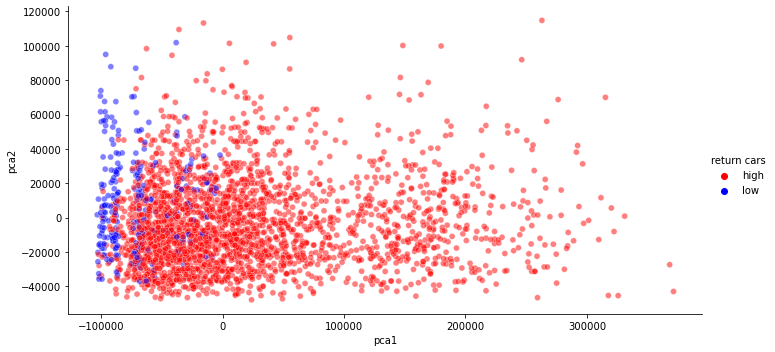

In [11]:
import numpy as np
ndf=df.copy()
#Creat a column to see the depreciation
ndf['depreciation'] = ((ndf['Model_Price']-ndf['Sale_Price'])/((ndf['Sold_Year']-ndf['Model_Year'])*(ndf['Model_Price'])))*100
ndf.replace([np.inf, -np.inf], np.nan, inplace=True)

#Delete the rows with inf values 
ndf.dropna(subset = ['depreciation'], inplace=True)

ndf['depreciation']=ndf['depreciation'].apply(lambda x: x if x>=0 else abs(x))

from sklearn.decomposition import PCA
#create columns for PCA1 and PCA2 to anaylze the data

num_columns = ndf.select_dtypes(exclude='object').columns
pca_input_columns = num_columns.drop(['Sale_Price'])
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(ndf[pca_input_columns]) 
ndf['pca1'] = principalComponents[:,0]
ndf['pca2'] = principalComponents[:,1]

#Create column to rank the cars to high return cars or low return cars
plt.figure()
ndf['return cars'] = ndf['depreciation'].apply(lambda  x: 'low' if x>=20 else 'high' if x<=10 else 'medium')
relevant_data = (ndf['return cars'] == 'high') | (ndf['return cars'] == 'low') 
sns.relplot(x='pca1',y='pca2',
            hue='return cars', palette=['r','b'],
            kind='scatter',alpha=0.5,
            height=5, aspect=2,
            data=ndf[relevant_data])
display(ndf.head(10))


#plt.figure()
#x_col=df[['Type','Model_Year','Model_Price','Sold_Year','Class','KM_Driven','depreciation']]
#for c in x_col:
#    sns.relplot(x='pca1',y='pca2',hue=c ,col='depreciation',kind='scatter',alpha=0.5,height=5, aspect=1,data=ndf)  
#plt.show()

print("The input variables almost seperate high and low return cars")

## Task-5

<Figure size 432x288 with 0 Axes>

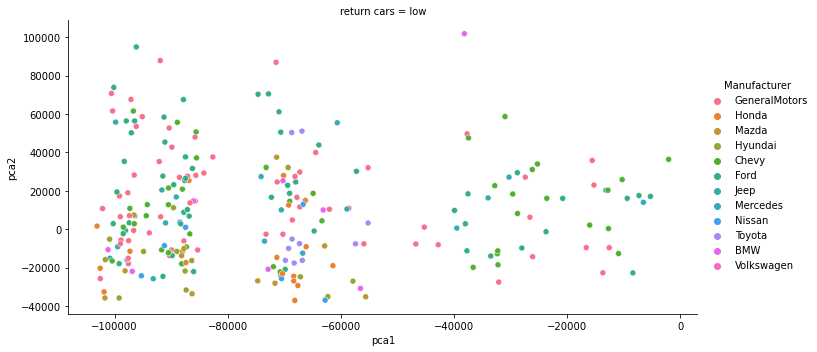

<Figure size 432x288 with 0 Axes>

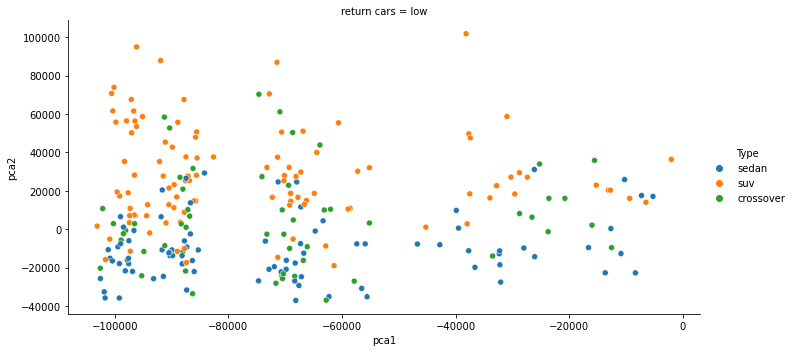

<Figure size 432x288 with 0 Axes>

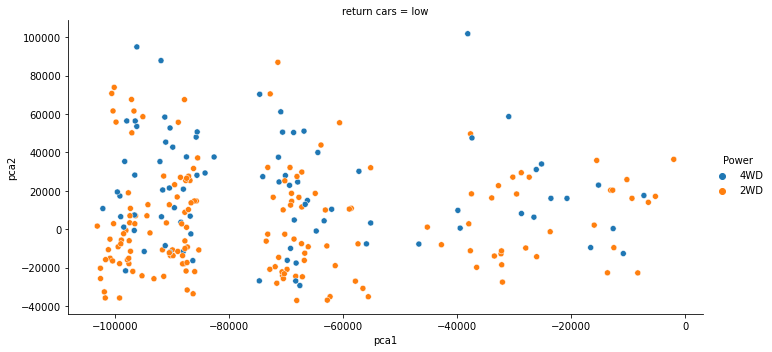

<Figure size 432x288 with 0 Axes>

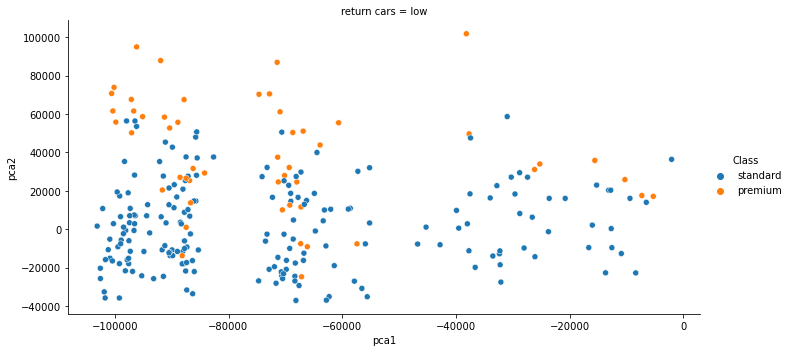

<Figure size 432x288 with 0 Axes>

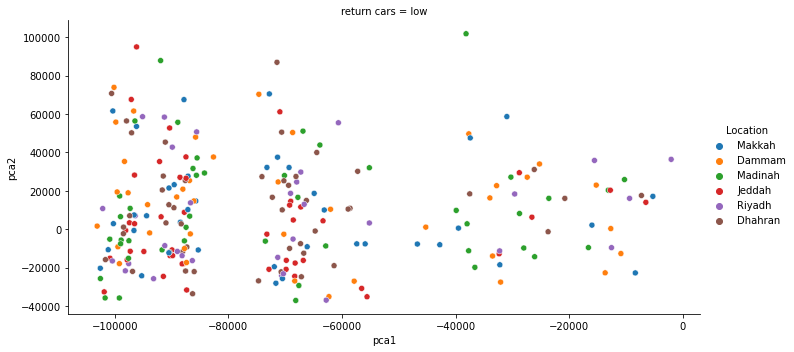

<Figure size 432x288 with 0 Axes>

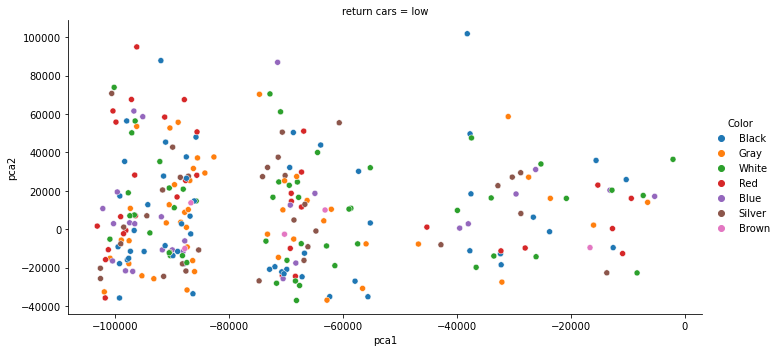

<Figure size 432x288 with 0 Axes>

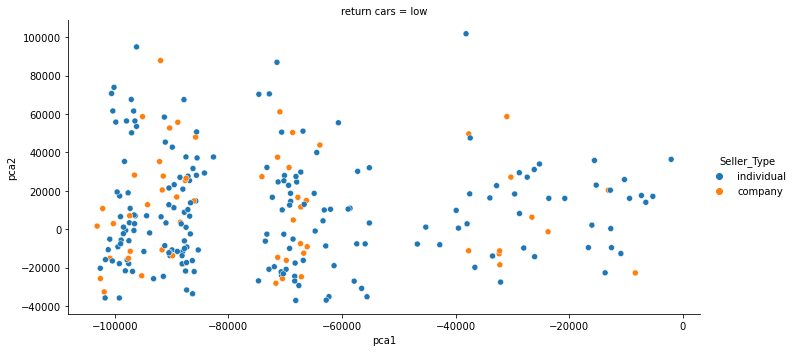

<Figure size 432x288 with 0 Axes>

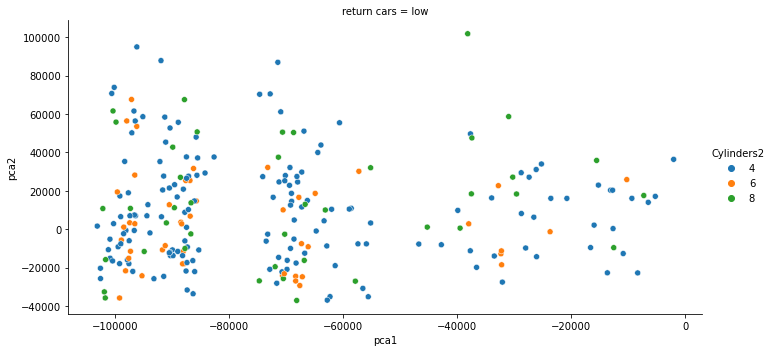

<Figure size 432x288 with 0 Axes>

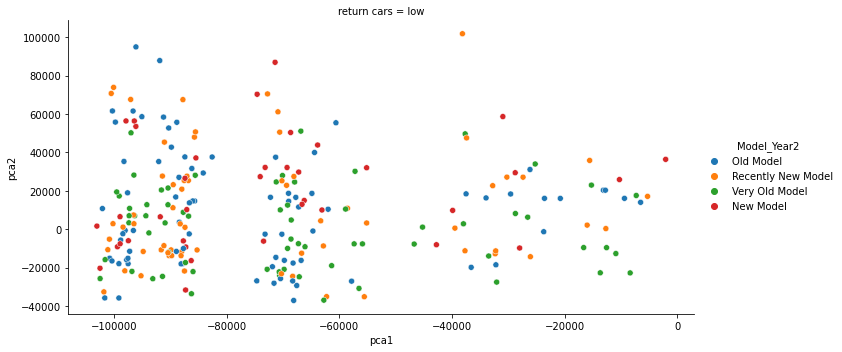

<Figure size 432x288 with 0 Axes>

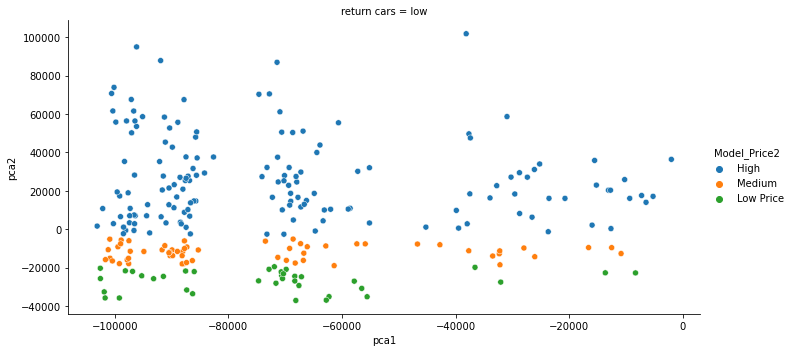

<Figure size 432x288 with 0 Axes>

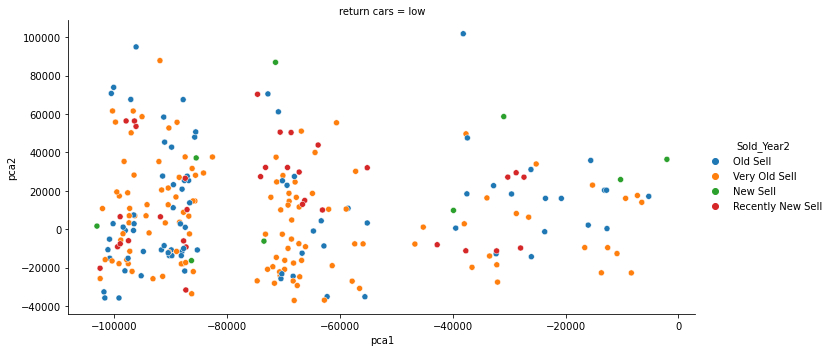

<Figure size 432x288 with 0 Axes>

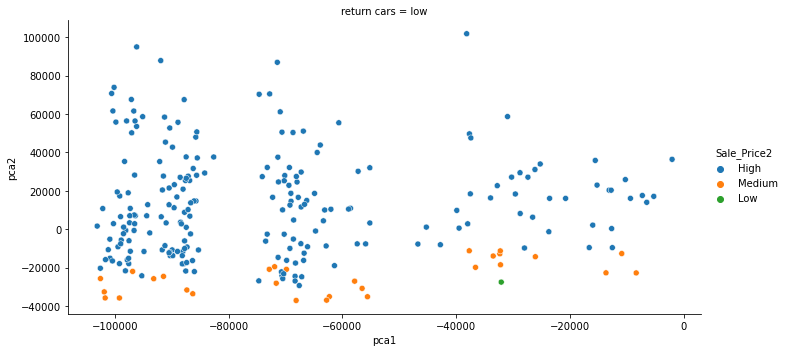

<Figure size 432x288 with 0 Axes>

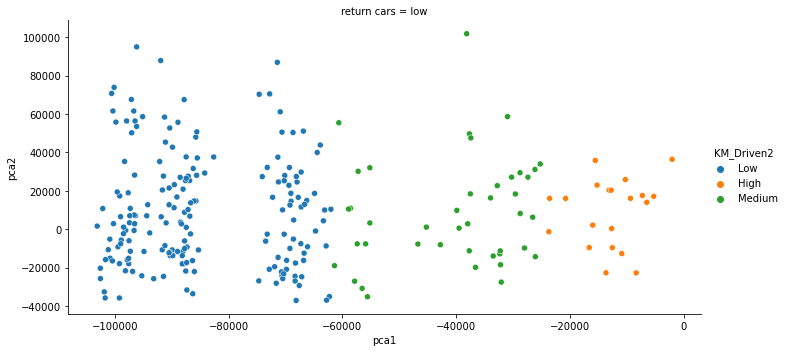

<Figure size 432x288 with 0 Axes>

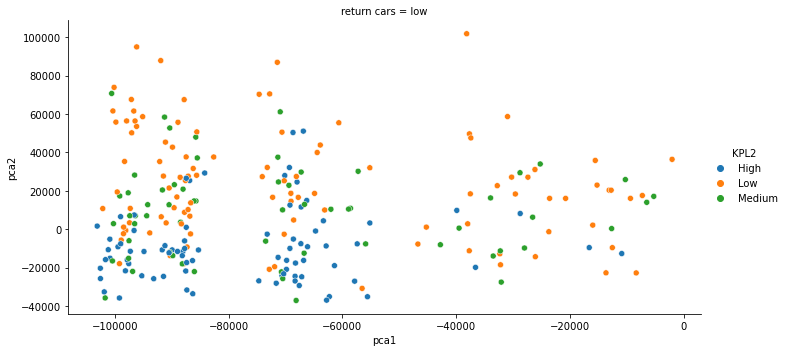

<Figure size 432x288 with 0 Axes>

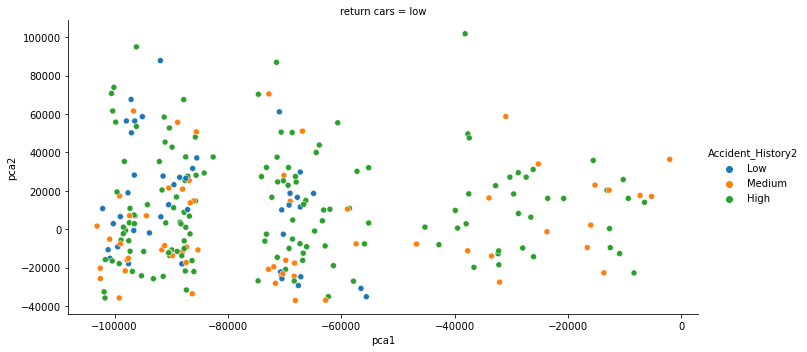

<Figure size 432x288 with 0 Axes>

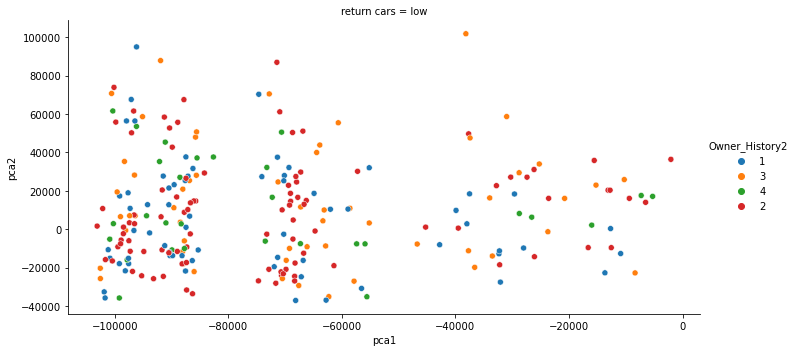

<Figure size 432x288 with 0 Axes>

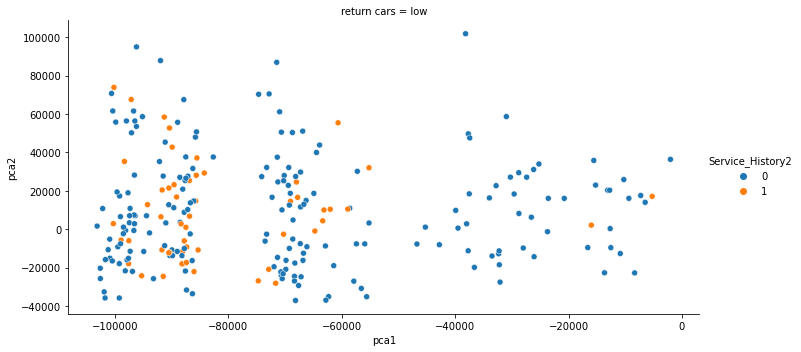

In [12]:
patterns=['Manufacturer','Type','Power','Class','Location','Color','Seller_Type','Cylinders2','Model_Year2','Model_Price2'
         ,'Sold_Year2','Sale_Price2','KM_Driven2','KPL2','Accident_History2','Owner_History2','Service_History2']
pdf = ndf
#Create new categorical columns by dividing the outcomes in fair intervals 
pdf["Cylinders2"]=ndf["Cylinders"].apply(lambda x: "4" if x==4 else "6" if x==6 else '8')
pdf["Owner_History2"]=ndf["Owner_History"].apply(lambda x: "1" if x==1 else "2" if x==2 else '3' if x==3 else '4')
pdf["Service_History2"]=pdf["Service_History"].apply(lambda x: "0" if x==0 else '1')
pdf["Model_Year2"]=ndf["Model_Year"].apply(lambda x: "Very Old Model" if x<=1998 else "Old Model" if x<=2002 else
                                           'Recently New Model' if x<=2005 else "New Model")
pdf["Sold_Year2"]=ndf["Sold_Year"].apply(lambda x: "Very Old Sell" if x<=2002 else 'Old Sell' if x<=2006 else
                                         "Recently New Sell" if x<=2009 else "New Sell")
#Create new numerical columns after classifying the categorical columns according to Q1,Q2,Q3
#Note: we try each categorical columns to get Q1,Q2,Q3 by this code: 
#display(pdf['categorical columns'].describe())
pdf["Model_Price2"]=ndf["Model_Price"].apply(lambda x: "Low Price" if x<=68555 else 'Medium' if x<=84014 else 'High')
pdf["Sale_Price2"]=ndf["Sale_Price"].apply(lambda x: "Low " if x<=36018 else 'Medium' if x<= 45701 else 'High')
pdf["KM_Driven2"]=ndf["KM_Driven"].apply(lambda x: "Low " if x<=47325 else 'Medium' if x<=84541 else 'High')
pdf["KPL2"]=pdf["KPL"].apply(lambda x: "Low " if x<=5.72 else 'Medium' if x<=8.78 else 'High')
pdf["Accident_History2"]=ndf["Accident_History"].apply(lambda x: "Low " if x<=3 else 'Medium' if x<=5 else 'High')
#Draw the graphs for low performing estates
sCol = ndf['return cars'] == 'low'
xdf = pdf.loc[sCol,:]
for i in patterns:
    plt.figure()
    sns.relplot(x="pca1",y="pca2",data=xdf,col='return cars',aspect=2, hue=i)
    plt.show()     

## Task-6

<Figure size 432x288 with 0 Axes>

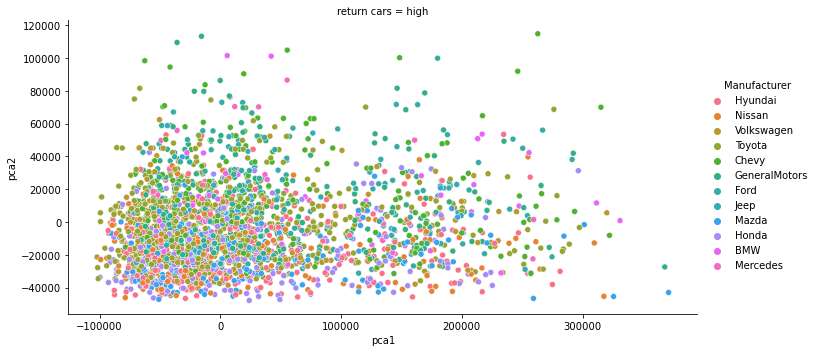

<Figure size 432x288 with 0 Axes>

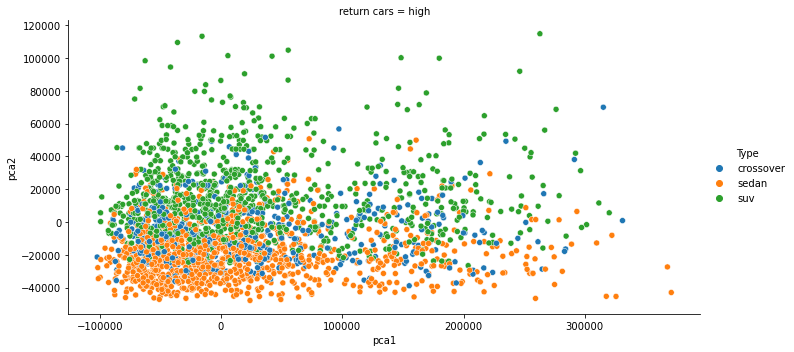

<Figure size 432x288 with 0 Axes>

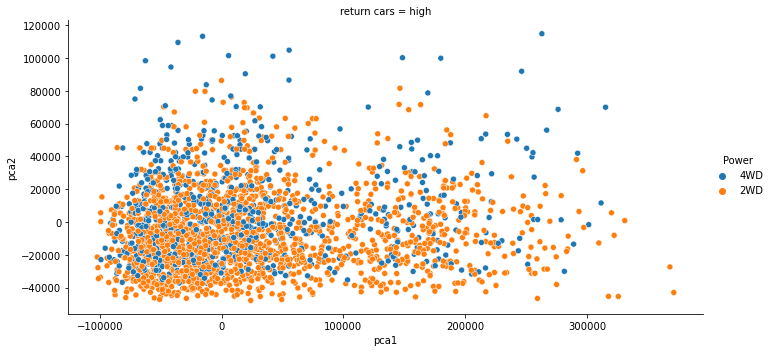

<Figure size 432x288 with 0 Axes>

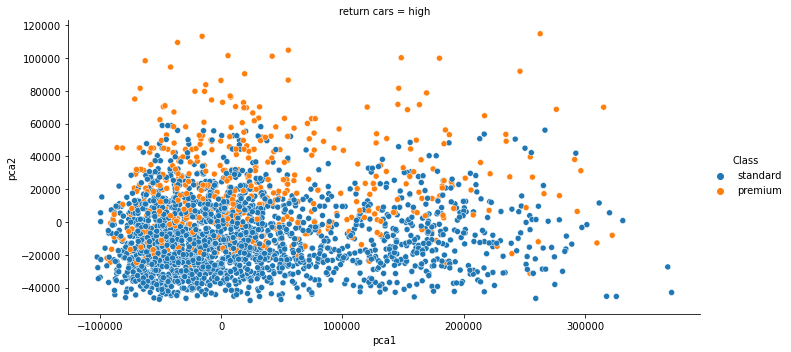

<Figure size 432x288 with 0 Axes>

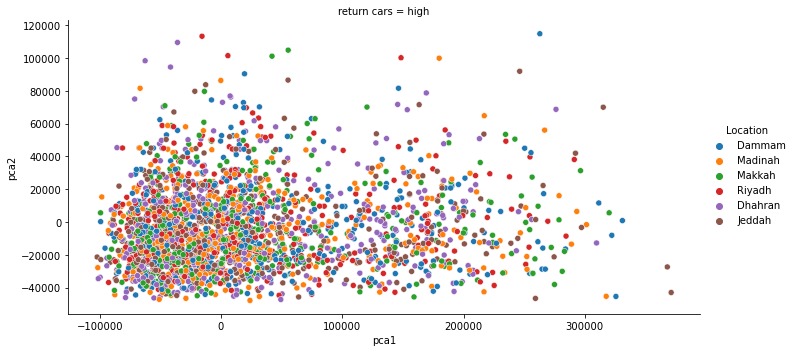

<Figure size 432x288 with 0 Axes>

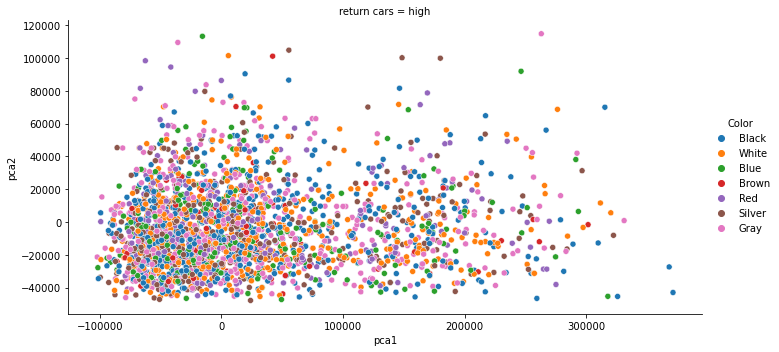

<Figure size 432x288 with 0 Axes>

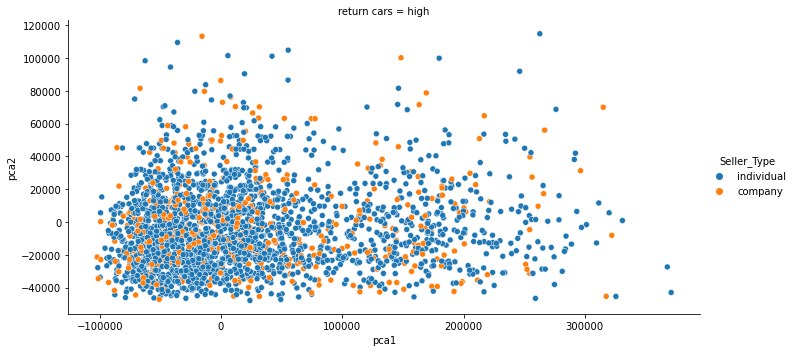

<Figure size 432x288 with 0 Axes>

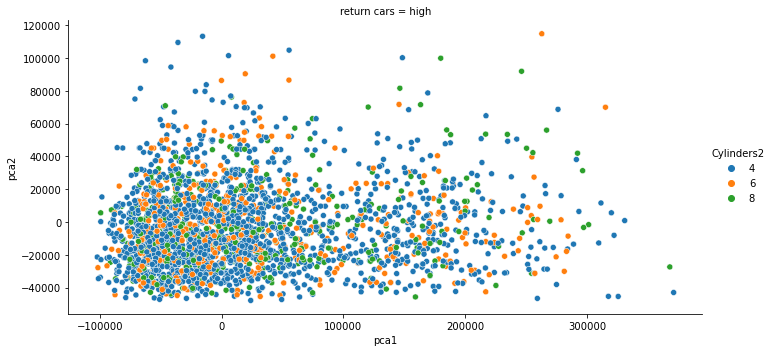

<Figure size 432x288 with 0 Axes>

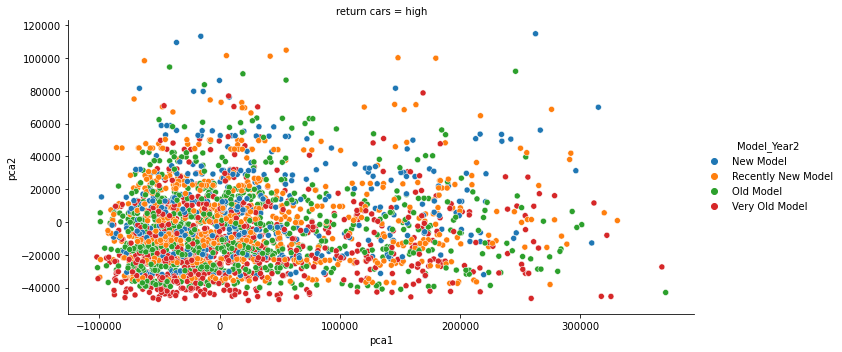

<Figure size 432x288 with 0 Axes>

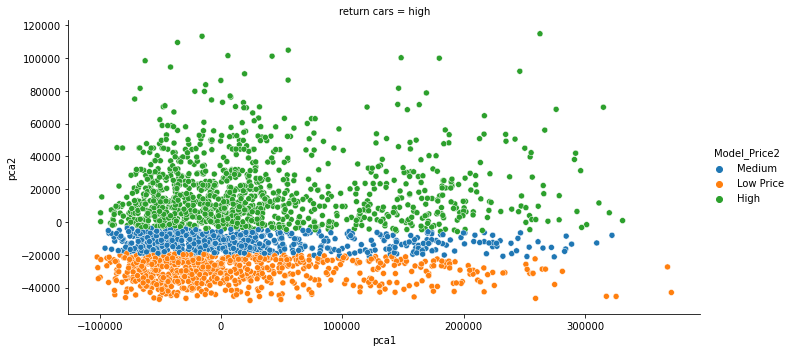

<Figure size 432x288 with 0 Axes>

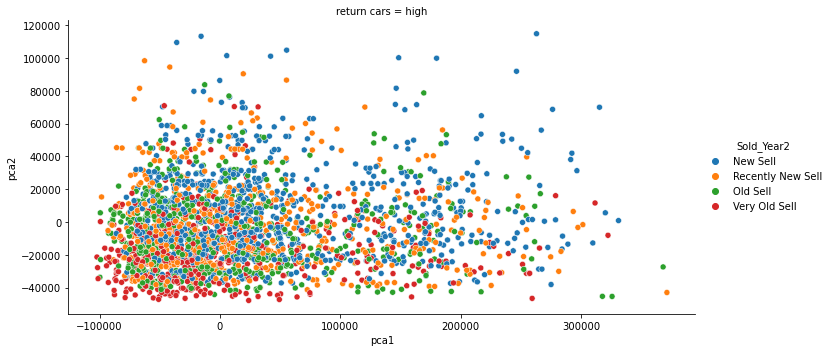

<Figure size 432x288 with 0 Axes>

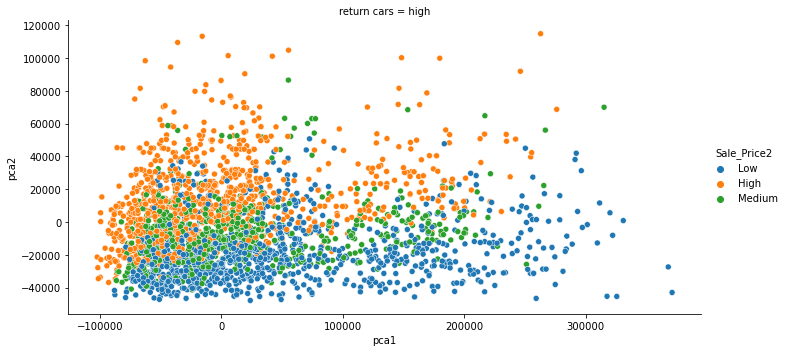

<Figure size 432x288 with 0 Axes>

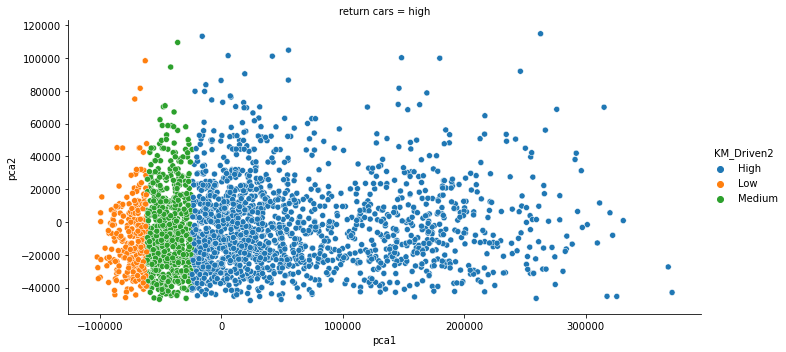

<Figure size 432x288 with 0 Axes>

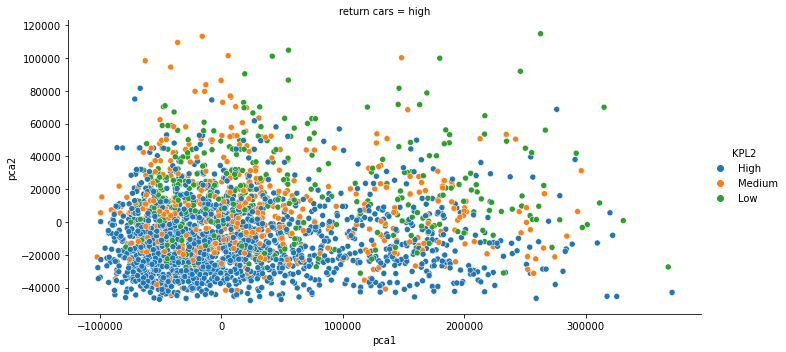

<Figure size 432x288 with 0 Axes>

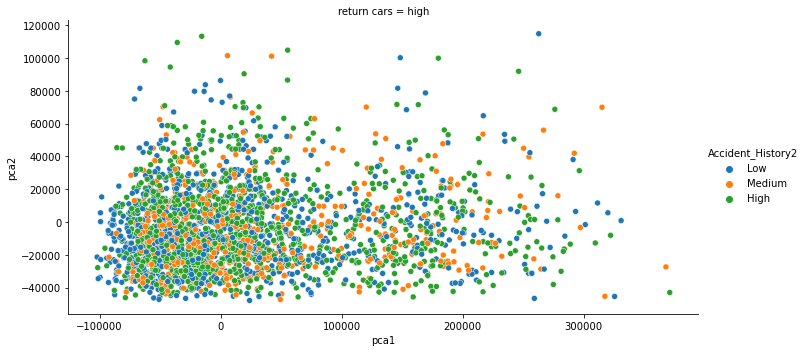

<Figure size 432x288 with 0 Axes>

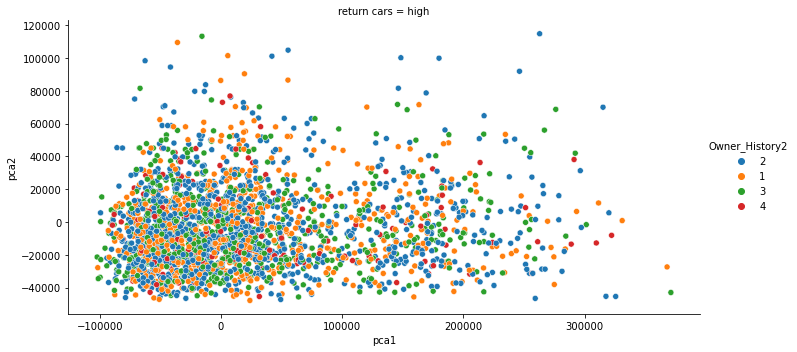

<Figure size 432x288 with 0 Axes>

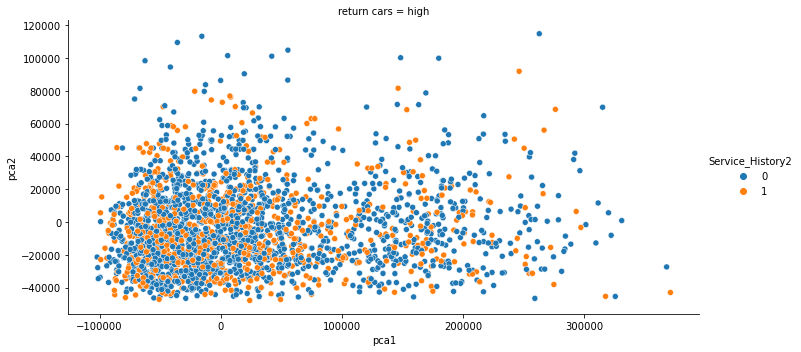

In [6]:
import numpy as np
import pandas as pd
patterns=['Manufacturer','Type','Power','Class','Location','Color','Seller_Type','Cylinders2','Model_Year2','Model_Price2'
         ,'Sold_Year2','Sale_Price2','KM_Driven2','KPL2','Accident_History2','Owner_History2','Service_History2']

sCol = ndf['return cars'] == 'high'
xdf = pdf.loc[sCol,:]
for i in patterns:
    plt.figure()
    sns.relplot(x="pca1",y="pca2",data=xdf,col='return cars',aspect=2, hue=i)
    plt.show()

## Task-7

In [1]:
import pandas as pd
import numpy as np
df= pd.read_csv('Group_08_01_B.csv',delimiter=",")

df['Sale_Price'] = df['Sale_Price'].apply(lambda x : int(x.replace('SAR','').replace(',',''))if type(x)==str else x)

df['Model_Price'] = df['Model_Price'].apply(lambda x :int(x.replace('SAR','').replace(',','')) if type(x)==str else x)

cor_b = df.corr(method = 'pearson') 

display(cor_b)

print("The correlation between the input variables and Sale Price column for File B is :")
display(cor_b['Sale_Price'])
#Part File B

df= pd.read_csv('Group_08_01_C.csv',delimiter=",")

df['Sale_Price'] = df['Sale_Price'].apply(lambda x : int(x.replace('SAR','').replace(',',''))if type(x)==str else x)

df['Model_Price'] = df['Model_Price'].apply(lambda x :int(x.replace('SAR','').replace(',','')) if type(x)==str else x)

cor_c = df.corr(method = 'pearson') 

display(cor_c)


print("The correlation between the input variables and Sale Price column for File C is :")
display(cor_c['Sale_Price'])

#Part File C

Cylinders  Model_Year  Model_Price  Sold_Year  Sale_Price  \
Cylinders          1.000000    0.023210    -0.000988   0.028716   -0.032429   
Model_Year         0.023210    1.000000     0.276023   0.904195    0.222206   
Model_Price       -0.000988    0.276023     1.000000   0.252878    0.731536   
Sold_Year          0.028716    0.904195     0.252878   1.000000   -0.037582   
Sale_Price        -0.032429    0.222206     0.731536  -0.037582    1.000000   
KM_Driven          0.008121    0.020465     0.024775   0.267704   -0.356834   
KPL               -0.307444   -0.008348    -0.520459  -0.012528   -0.250607   
Accident_History  -0.000984    0.031950    -0.002679   0.031813   -0.098012   
Owner_History      0.012590    0.029474     0.023770   0.021666    0.001034   
Service_History   -0.002490   -0.008628     0.001924  -0.010490    0.062979   

                  KM_Driven       KPL  Accident_History  Owner_History  \
Cylinders          0.008121 -0.307444         -0.000984       0.012590   
Model_Year         0.020465 -0.008348          0.031950       0.029474   
Model_Price        0.024775 -0.520459         -0.002679       0.023770   
Sold_Year          0.267704 -0.012528          0.031813       0.021666   
Sale_Price        -0.356834 -0.250607         -0.098012       0.001034   
KM_Driven          1.000000 -0.018765         -0.001313      -0.000007   
KPL               -0.018765  1.000000         -0.022984      -0.004939   
Accident_History  -0.001313 -0.022984          1.000000       0.013509   
Owner_History     -0.000007 -0.004939          0.013509       1.000000   
Service_History   -0.005121 -0.011688          0.003761      -0.003439   

                  Service_History  
Cylinders               -0.002490  
Model_Year              -0.008628  
Model_Price              0.001924  
Sold_Year               -0.010490  
Sale_Price               0.062979  
KM_Driven               -0.005121  
KPL                     -0.011688  
Accident_History         0.003761  
Owner_History           -0.003439  
Service_History          1.000000

The correlation between the input variables and Sale Price column for File B is :


Cylinders          -0.032429
Model_Year          0.222206
Model_Price         0.731536
Sold_Year          -0.037582
Sale_Price          1.000000
KM_Driven          -0.356834
KPL                -0.250607
Accident_History   -0.098012
Owner_History       0.001034
Service_History     0.062979
Name: Sale_Price, dtype: float64

Cylinders  Model_Year  Model_Price  Sold_Year  Sale_Price  \
Cylinders          1.000000   -0.047050    -0.002992  -0.042073   -0.032165   
Model_Year        -0.047050    1.000000     0.281036   0.905856    0.260789   
Model_Price       -0.002992    0.281036     1.000000   0.240126    0.776160   
Sold_Year         -0.042073    0.905856     0.240126   1.000000    0.007636   
Sale_Price        -0.032165    0.260789     0.776160   0.007636    1.000000   
KM_Driven          0.018384   -0.033081     0.003731   0.220323   -0.344726   
KPL               -0.322790   -0.007717    -0.536212   0.006557   -0.286208   
Accident_History   0.022195   -0.005741     0.013495  -0.013895   -0.069695   
Owner_History     -0.016958   -0.012771    -0.009279  -0.017400   -0.029080   
Service_History    0.019292    0.018167     0.020619   0.018988    0.080107   

                  KM_Driven       KPL  Accident_History  Owner_History  \
Cylinders          0.018384 -0.322790          0.022195      -0.016958   
Model_Year        -0.033081 -0.007717         -0.005741      -0.012771   
Model_Price        0.003731 -0.536212          0.013495      -0.009279   
Sold_Year          0.220323  0.006557         -0.013895      -0.017400   
Sale_Price        -0.344726 -0.286208         -0.069695      -0.029080   
KM_Driven          1.000000 -0.009048          0.009712       0.029091   
KPL               -0.009048  1.000000         -0.012784      -0.004037   
Accident_History   0.009712 -0.012784          1.000000       0.025117   
Owner_History      0.029091 -0.004037          0.025117       1.000000   
Service_History    0.010097 -0.009819          0.005520      -0.026572   

                  Service_History  
Cylinders                0.019292  
Model_Year               0.018167  
Model_Price              0.020619  
Sold_Year                0.018988  
Sale_Price               0.080107  
KM_Driven                0.010097  
KPL                     -0.009819  
Accident_History         0.005520  
Owner_History           -0.026572  
Service_History          1.000000

The correlation between the input variables and Sale Price column for File C is :


Cylinders          -0.032165
Model_Year          0.260789
Model_Price         0.776160
Sold_Year           0.007636
Sale_Price          1.000000
KM_Driven          -0.344726
KPL                -0.286208
Accident_History   -0.069695
Owner_History      -0.029080
Service_History     0.080107
Name: Sale_Price, dtype: float64

## Task-8

In [25]:
#Ridge regression is useful when there are correlated input columns.
from sklearn.linear_model import RidgeCV
from sklearn.metrics import mean_squared_error

data = df.select_dtypes(include='object').columns
dfcopy = df.copy(deep=True)
dfcopy = dfcopy.drop(index=2, columns=data)
# display(dfcopy)

from sklearn.model_selection import train_test_split
X = dfcopy.iloc[:,:-1].values
y = dfcopy.iloc[:, -1].values 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

import numpy as np
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaler.fit(np.c_[X_train,y_train])

A_train = scaler.transform(np.c_[X_train,y_train])
X_train = A_train[:,:-1]
y_train = A_train[:,-1]

A_test = scaler.transform(np.c_[X_test,y_test])
X_test = A_test[:,:-1]
y_test = A_test[:,-1]

reg2 = RidgeCV(alphas=[1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2, 1e3], fit_intercept=False,cv=10).fit(X_train, y_train)
y_pred2 = reg2.predict(X_test)
print('The MSE using Ridge is:', mean_squared_error(y_test, y_pred2))
print('The coefficient estimates are:', reg2.coef_.tolist())

The MSE using Ridge is: 0.9333099080277947
The coefficient estimates are: [-0.032747275476013284, -0.5734724960146096, -0.4507127006425293, 0.6315702475123639, 0.5455876399749426, 0.04513656264181017, -0.10893047807422444, 0.04631010770896308, 0.01304002911384228]


## Task-9

In [26]:
#Lasso is useful when there are unrelated input columns.
from sklearn.linear_model import LassoCV

reg3 = LassoCV(alphas=[1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2, 1e3],  fit_intercept=False,cv=10, random_state=0).fit(X_train, y_train)
y_pred3 = reg3.predict(X_test)
print('The MSE using Lasso is:', mean_squared_error(y_test, y_pred3))
print('The coefficient estimates are:', reg3.coef_.tolist())

The MSE using Lasso is: 0.9333342035215655
The coefficient estimates are: [-0.029841681936693138, -0.525608035717123, -0.4196405343907834, 0.5790205123432876, 0.5111911338137898, 0.044441076033296174, -0.0999946252228554, 0.04214186504178623, 0.011355314512856018]


## Task-10

In [3]:
import pandas as pd
df = pd.read_csv('Group_08_01_C.csv', delimiter = ',')
display(df.info())
# display(df.head())

# resolving inconsistency
df["Model_Price"]=df["Model_Price"].apply(lambda x: (x.replace(",","")))
df["Model_Price"]=df["Model_Price"].apply(lambda x: int(x.replace(" SAR", "")))
df["Sale_Price"]=df["Sale_Price"].apply(lambda x: (x.replace(",","")))
df["Sale_Price"]=df["Sale_Price"].apply(lambda x: int(x.replace(" SAR", "")))

# label encoding for class and cylinders
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
encoder.fit(df['Cylinders'])
df['Cylinders']=encoder.transform(df['Cylinders'])

encoder1 = LabelEncoder()
encoder1.fit(df['Seller_Type'])
df['Seller_Type']=encoder1.transform(df['Seller_Type'])

encoder2 = LabelEncoder()
encoder2.fit(df['Power'])
df['Power']=encoder2.transform(df['Power'])

# Min max scaling the year model and cylinders
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(df[['Model_Year']])
df['Model_Year']=scaler.transform(df[['Model_Year']])

scaler0 = MinMaxScaler()
scaler0.fit(df[['Sold_Year']])
df['Sold_Year']=scaler0.transform(df[['Sold_Year']])

# Standard Scaling the model and sale prices
from sklearn.preprocessing import StandardScaler
scaler1 = StandardScaler()
scaler1.fit(df[['Model_Price']])
df['Model_Price']=scaler1.transform(df[['Model_Price']])

scaler2 = StandardScaler()
scaler2.fit(df[['Sale_Price']])
df['Sale_Price']=scaler2.transform(df[['Sale_Price']])

scaler3 = StandardScaler()
scaler3.fit(df[['KM_Driven']])
df['KM_Driven']=scaler3.transform(df[['KM_Driven']])

scaler4 = StandardScaler()
scaler4.fit(df[['KPL']])
df['KPL']=scaler4.transform(df[['KPL']])

# One hot incoding for Type and Color because they are catagorial without ordinality
# print(df['Color'].unique())
df = pd.get_dummies(df, columns=['Color'],drop_first=False)

# We will drop Location because it dosent serve as an important input compared to other inputs and its also ambigious
df.drop("Location", axis=1, inplace=True)

# Manual mapping for the type and class because it has ordinal property
edu_mapping = {'sedan':1, 'crossover':2, 'suv':3}
df['Type'] = df['Type'].map(edu_mapping)

edu_mapping = {'standard':0, 'premium':1}
df['Class'] = df['Class'].map(edu_mapping)
# print(df['Manufacturer'].unique())

# mapping the make column based on three catagories based on the origin of the make
manufacturer_mapping = {'Nesshan':'Asia', 'Honta':'Asia', 'Masda':'Asia', 'Toyoda':'Asia', 'Huendae':'Asia',
              'Fourd':'USA', 'Geep':'USA', 'JournalMotors':'USA', 'Shevy':'USA',
              'Mercetes':'Europe', 'Wolksvagon':'Europe', 'BeEmW.':'Europe'}

df['Manufacturer'] = df['Manufacturer'].map(manufacturer_mapping) 

df = pd.get_dummies(df, columns=['Manufacturer'],drop_first=False)

# display(df.head())
display(df.info())

import numpy as np
# Generate Train - Test splits
from sklearn.model_selection import train_test_split
X = df.iloc[:,:-1].values
y = df.iloc[:, -1].values 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scaling the Train - Test splits
#from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler()

#scaler.fit(np.c_[X_train,y_train])

#A_train = scaler.transform(np.c_[X_train,y_train])
#X_train = A_train[:,:-1]
#y_train = A_train[:,-1]

#A_test = scaler.transform(np.c_[X_test,y_test])
#X_test = A_test[:,:-1]
#y_test = A_test[:,-1]

# Regression Analysis: Mean Squared Error Metric
from sklearn.metrics import mean_squared_error

## OLS
from sklearn.linear_model import LinearRegression
reg1 = LinearRegression(fit_intercept=False).fit(X_train, y_train)
y_pred1 = reg1.predict(X_test)
print('The MSE using OLS is:', mean_squared_error(y_test, y_pred1))


## Ridge
from sklearn.linear_model import RidgeCV
reg2 = RidgeCV(alphas=[1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2, 1e3], fit_intercept=False,cv=10).fit(X_train, y_train)
y_pred2 = reg2.predict(X_test)
print('The MSE using Ridge is:', mean_squared_error(y_test, y_pred2))


## Lasso
from sklearn.linear_model import LassoCV
reg3 = LassoCV(alphas=[1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2, 1e3], 
               fit_intercept=False,cv=10, random_state=0).fit(X_train, y_train)
y_pred3 = reg3.predict(X_test)
print('The MSE using Lasso is:', mean_squared_error(y_test, y_pred3))

## Details of the best estimates
print('OLS coefficient estimates are:', reg1.coef_)



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Manufacturer      2000 non-null   object 
 1   Type              2000 non-null   object 
 2   Cylinders         2000 non-null   int64  
 3   Model_Year        2000 non-null   int64  
 4   Model_Price       2000 non-null   object 
 5   Sold_Year         2000 non-null   int64  
 6   Sale_Price        2000 non-null   object 
 7   KM_Driven         2000 non-null   int64  
 8   KPL               2000 non-null   float64
 9   Power             2000 non-null   object 
 10  Class             2000 non-null   object 
 11  Location          2000 non-null   object 
 12  Accident_History  2000 non-null   int64  
 13  Owner_History     2000 non-null   int64  
 14  Color             2000 non-null   object 
 15  Seller_Type       2000 non-null   object 
 16  Service_History   2000 non-null   int64  


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Type                 2000 non-null   int64  
 1   Cylinders            2000 non-null   int64  
 2   Model_Year           2000 non-null   float64
 3   Model_Price          2000 non-null   float64
 4   Sold_Year            2000 non-null   float64
 5   Sale_Price           2000 non-null   float64
 6   KM_Driven            2000 non-null   float64
 7   KPL                  2000 non-null   float64
 8   Power                2000 non-null   int64  
 9   Class                2000 non-null   int64  
 10  Accident_History     2000 non-null   int64  
 11  Owner_History        2000 non-null   int64  
 12  Seller_Type          2000 non-null   int64  
 13  Service_History      2000 non-null   int64  
 14  Color_Black          2000 non-null   uint8  
 15  Color_Blue           2000 non-null   u

None

The MSE using OLS is: 0.019163025038964308
The MSE using Ridge is: 0.01916651815124961
The MSE using Lasso is: 0.022219799483031377
OLS coefficient estimates are: [-8.08573353e-03  4.03700656e-03  5.84135361e-02  1.55291369e-02
 -4.05801096e-02 -1.51600469e-02 -1.13056706e-02  6.29512843e-04
 -5.01711041e-03 -5.86568984e-03  2.68673352e-04  5.60442420e-03
 -2.31159061e-02 -1.87638622e-02  9.66817643e-01  9.40811419e-01
  9.33167823e-01  9.58406757e-01  9.60685737e-01  9.58779105e-01
  9.56581082e-01 -9.39257277e-01 -9.41046394e-01]


## References

In [ ]:
Topic_4_Basic_programming_concepts
Topic_5_Data_understanding_and_preparation
Topic_6_Exploratory_data_analysis
Topic_7_Linear_regression